In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_coca=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df_coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df_coca.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


**EDA**

In [4]:
df_coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
df_coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
df_coca[df_coca.duplicated()]

,Quarter,Sales


In [7]:
df_coca.nunique()

Quarter    42
Sales      42
dtype: int64

In [8]:
df_coca.shape

(42, 2)

In [9]:
df_coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [10]:
# converting into datetime format as the index was not in correct format.
df_coca['Quarter_Year'] = df_coca['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
df_coca.head(5)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [11]:
#Extract date from the quarters
df_coca['Date'] = (pd.to_datetime(df_coca['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
df_coca.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [12]:
#Extracting quarters from and creatin seperate column
df_coca['Quarters'] = 0

for i in range(42):
    n = df_coca['Quarter'][i]
    df_coca['Quarters'][i] = n[0:2]

df_coca.head(5)

<ipython-input-12-afa5f3fa4785>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coca['Quarters'][i] = n[0:2]


,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [13]:
#Create dummy variable for quarters
dummy = pd.DataFrame(pd.get_dummies(df_coca['Quarters']))
df1 = pd.concat((df_coca, dummy), axis=1)

df1.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [14]:
#drop the unnecessary columns
df1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [15]:
#Get Month column as index of data
df_raw = df1.copy()
df1.set_index('Date',inplace=True)

In [16]:
df1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


**Visualisations**

<Axes: xlabel='Date'>

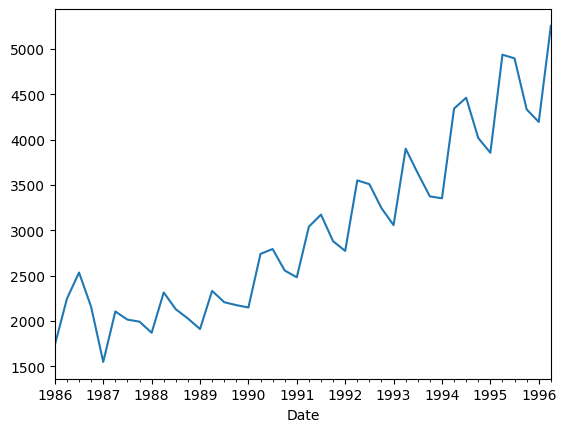

In [17]:
df1.Sales.plot()

- There is an upward trending data and there is a little bit seasonality in our data.

Histogram

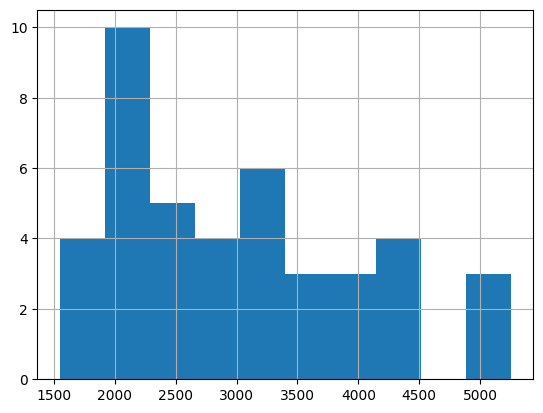

In [18]:
df1.Sales.hist()
plt.show()

Distplot

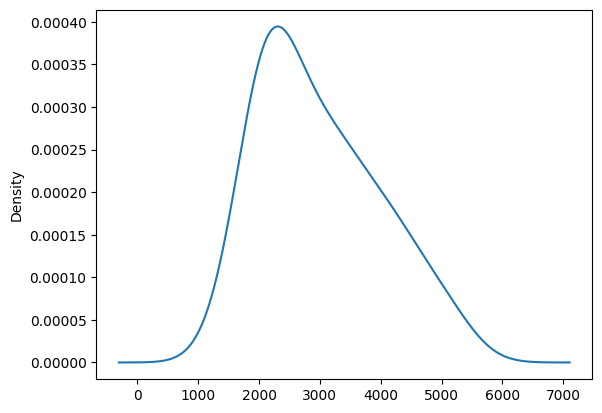

In [19]:
df1.Sales.plot(kind='kde')
plt.show()

- We can observe this a normally distributed data.

Lagplot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

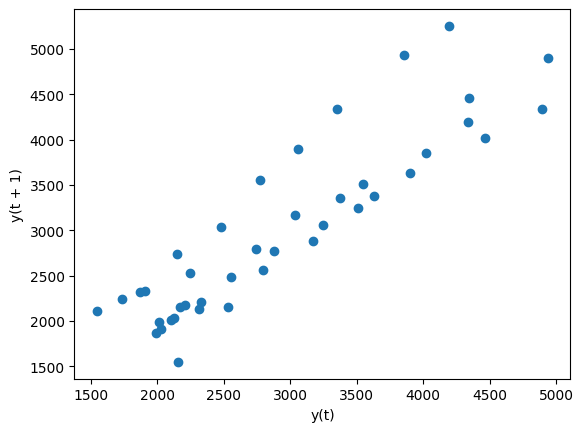

In [20]:
from pandas.plotting import lag_plot
lag_plot(df1.Sales)

In [21]:
#Get month and year columns in our data
df_raw["Date"] = pd.to_datetime(df_raw.Date,format="%b-%y")
df_raw["month"] = df_raw.Date.dt.strftime("%b")
 # month extraction
df_raw["year"] = df_raw.Date.dt.strftime("%Y")
# year extraction
df_raw.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987


Heatmap

<Axes: xlabel='Quarters', ylabel='year'>

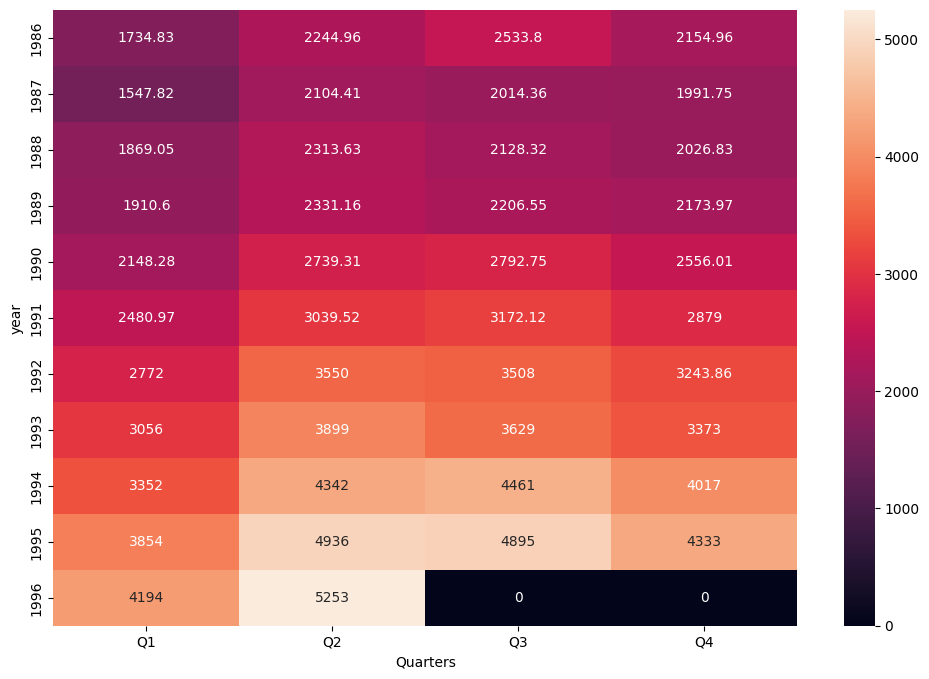

In [22]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df_raw,values="Sales",index="year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
 #fmt is format of the grid values

- Quarter Q2 have higher sales in the years.
- Sales have decresed every year.

Boxplot

<Axes: xlabel='year', ylabel='Sales'>

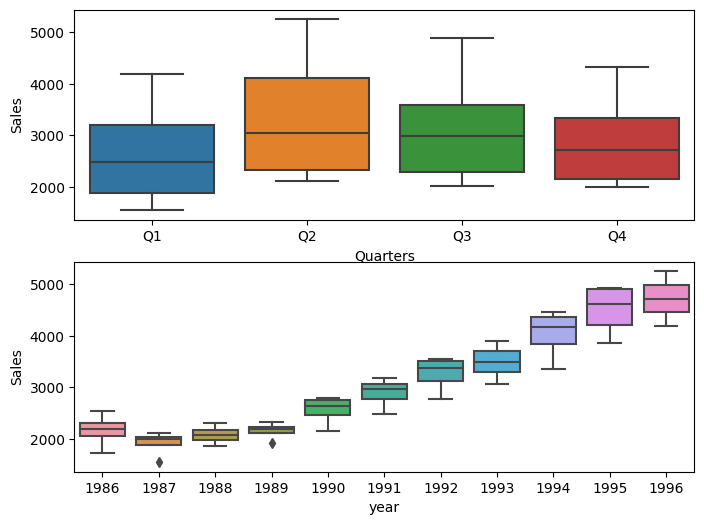

In [23]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=df_raw)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df_raw)

- Similar observations can be concluded from boxplot as well.

<Axes: xlabel='year', ylabel='Sales'>

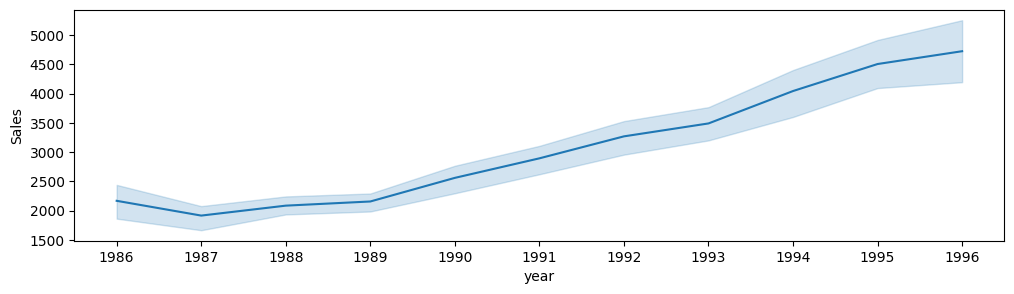

In [24]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=df_raw)

Moving Average

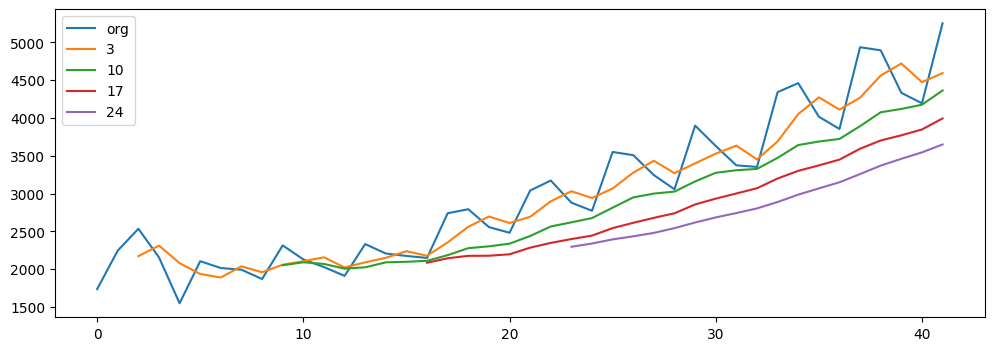

In [25]:
#Smoothning of the graph
plt.figure(figsize=(12,4))
df_raw.Sales.plot(label="org")
for i in range(3,30,7):
    df_raw["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time series decomposition plot

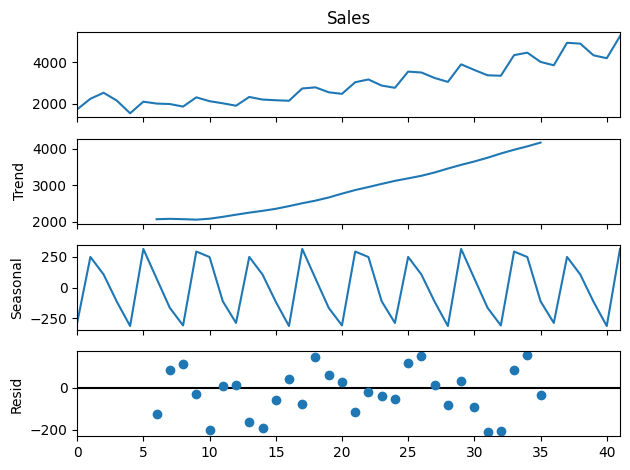

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df_raw.Sales,period=12)
decompose_ts_add.plot()
plt.show()                                           #1st is the original plot, 2nd in the trend, 3rd is the seaonality component, 4th is the noise component

- 1st graph is the original plot.
- Second grah shows the trend of data.
- Third graph shows seasonality in the data.
- 4th graph shows the noise in data.

ACF Plot

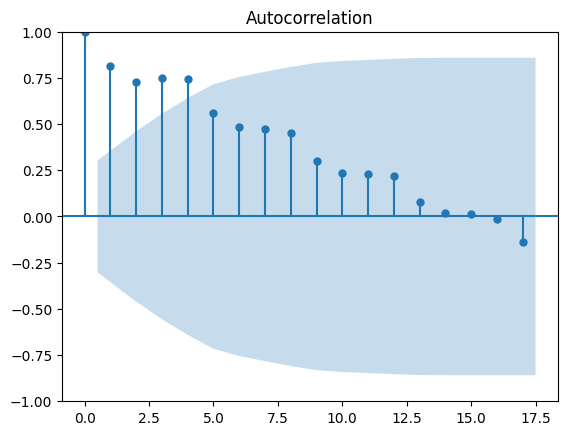

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df_raw["Sales"])                                                   #q=4

PACF Plot

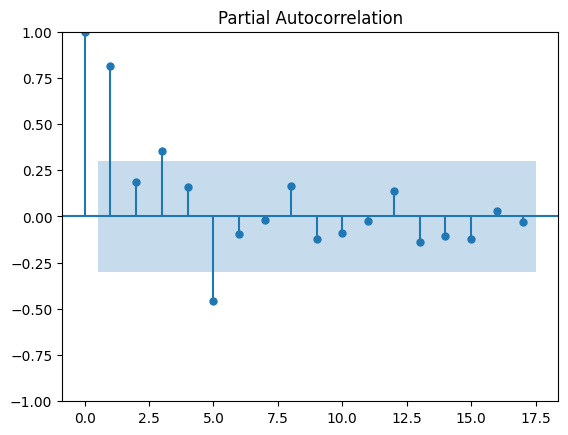

In [28]:
pacf = plot_pacf(df_raw["Sales"])
#p=1

# **Forecasting Model Based Methods**

**Data Preprocessing**

In [29]:
df_raw.shape

(42, 9)

In [30]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sales     42 non-null     float64       
 1   Date      42 non-null     datetime64[ns]
 2   Quarters  42 non-null     object        
 3   Q1        42 non-null     uint8         
 4   Q2        42 non-null     uint8         
 5   Q3        42 non-null     uint8         
 6   Q4        42 non-null     uint8         
 7   month     42 non-null     object        
 8   year      42 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3), uint8(4)
memory usage: 1.9+ KB


In [31]:
x=np.arange(1,43)

In [32]:
#timesteps
t=pd.Series(data=x)
t

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
dtype: int64

In [33]:
#timesteps square values
t_sqr=pd.Series(data=(x*x))
t_sqr

0        1
1        4
2        9
3       16
4       25
5       36
6       49
7       64
8       81
9      100
10     121
11     144
12     169
13     196
14     225
15     256
16     289
17     324
18     361
19     400
20     441
21     484
22     529
23     576
24     625
25     676
26     729
27     784
28     841
29     900
30     961
31    1024
32    1089
33    1156
34    1225
35    1296
36    1369
37    1444
38    1521
39    1600
40    1681
41    1764
dtype: int64

In [34]:
#log of number of passengers
df_raw['log_sales'] = np.log(df_raw['Sales'])

In [35]:
df_raw['t'] = t

In [36]:
df_raw['t_sqr'] = t_sqr

In [37]:
df_raw.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year,log_sales,t,t_sqr
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986,7.458663,1,1
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986,7.716443,2,4
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986,7.837477,3,9
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986,7.675529,4,16
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987,7.344602,5,25


**Split Train and Test data**

In [38]:
Train = df_raw.head(30)
Test = df_raw.tail(12)

**Model Building**

In [39]:
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

In [40]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=Train).fit()                                                              #Fit the train model
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                              #predict on test data
mae_linear = MAE(Test['Sales'],pred_linear)
mae_linear

0.15390960798745942

In [41]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
mae_Exp = MAE(Test['Sales'], np.exp(pred_Exp))
mae_Exp

0.110107621443933

In [42]:
#Quadratic

Quad = smf.ols('Sales~t+t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
mae_Quad = MAE(Test['Sales'],pred_Quad)
mae_Quad

0.1055831315597666

In [43]:
#Additive seasonality

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
mae_add_sea = MAE(Test['Sales'],pred_add_sea)
mae_add_sea

0.6840229690452247

In [44]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_sqr+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_sqr']]))
mae_add_sea_quad = MAE(Test['Sales'], pred_add_sea_quad)
mae_add_sea_quad

0.10915490303385623

In [45]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
mae_Mult_sea = MAE(Test['Sales'], np.exp(pred_Mult_sea))
mae_Mult_sea

0.7197711999139472

In [46]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
mae_Mult_add_sea = MAE(Test['Sales'], np.exp(pred_Mult_add_sea))
mae_Mult_add_sea

0.0911433552729747

# **Forecasing by Data driven Model**

In [47]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# SES
from statsmodels.tsa.holtwinters import Holt
# Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [48]:
df_coca.head()

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [49]:
Train = df_coca.head(30)
Test = df_coca.tail(12)

**Simple Exponential Method**

In [50]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_ses = MAE(pred_ses,Test.Sales)
MAE_ses

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


0.22056896419792418

**Holt method**

In [51]:
# Holt method
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_hw = MAE(pred_hw,Test.Sales)
MAE_hw

<ipython-input-51-788970a198fe>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


0.11247566037445567

**Holts winter exponential smoothing with additive seasonality and additive trend**

In [52]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_add_add = MAE(pred_hwe_add_add,Test.Sales)
MAE__hwe_add_add

0.05537258097335431

**Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [53]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_mul_add = MAE(pred_hwe_mul_add,Test.Sales)
MAE__hwe_mul_add

0.07532113536522467

# **Forecasting by ARIMA Model**

In [54]:
from numpy import sqrt
import warnings
import itertools
import statsmodels.api as sm

In [55]:
df_coca.head()

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [56]:
# separate out a validation dataset
split_point = len(df_coca) - 12
dataset, validation = df_coca[0:split_point], df_coca[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 30, Validation 12


**Persistence/ Base model**

In [57]:
# evaluate a persistence model
from sklearn.metrics import mean_squared_error

# prepare data
X = dataset.Sales.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [58]:
train.size, test.size

(15, 15)

In [59]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
MAE_base = MAE(predictions, test)
print('MAE_base: %.3f' % MAE_base)

>Predicted=2206.550, Expected=2173.968
>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
MAE_base: 0.089


**ARIMA Model**

In [60]:
df_raw.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year,log_sales,t,t_sqr
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986,7.458663,1,1
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986,7.716443,2,4
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986,7.837477,3,9
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986,7.675529,4,16
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987,7.344602,5,25


In [61]:
df_raw.drop(['Quarters', 'Q1', 'Q2', 'Q3', 'Q4','month','year','log_sales','t','t_sqr'], axis=1, inplace=True)

In [62]:
df_raw.head()

,Sales,Date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01


In [63]:
df_raw.set_index('Date', inplace=True)

In [64]:
#performing test to check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [65]:
adf_test(df_raw['Sales'])

ADF Statistics: 1.309421015326811
p- value: 0.9966611673930905
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [66]:
## Use Techniques Differencing 1st time
df_raw['Sales First Difference']=df_raw['Sales']-df_raw['Sales'].shift(1)

In [67]:
adf_test(df_raw['Sales First Difference'].dropna())

ADF Statistics: -2.5015370020337953
p- value: 0.11510080332405614
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [68]:
## Use Techniques Differencing 2nd time
df_raw['Sales Second Difference']=df_raw['Sales First Difference']-df_raw['Sales First Difference'].shift(1)

In [69]:
adf_test(df_raw['Sales Second Difference'].dropna())

ADF Statistics: -27.63262494638169
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


- We can perform ARIMA on Sales Second Difference data as this is stationary.

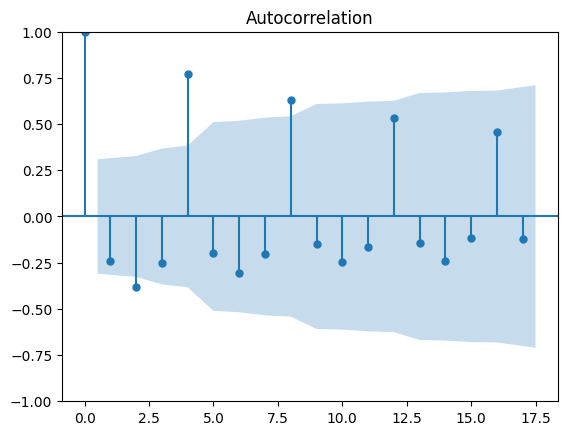

In [70]:
acf = plot_acf(df_raw["Sales Second Difference"].dropna())              #q=2/4

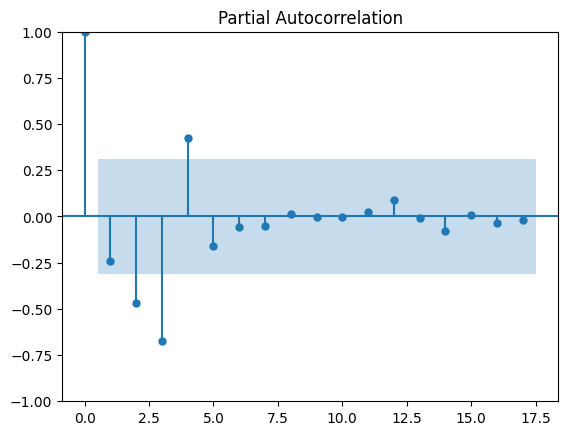

In [71]:
pacf = plot_pacf(df_raw["Sales Second Difference"].dropna())
 #p=2/3

In [72]:
pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [73]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA.ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        MAE = np.mean(np.abs((predictions-test)/test))
        return MAE

In [74]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    MAE = evaluate_arima_model(train, order)
                    if MAE < best_score:
                        best_score, best_cfg = MAE, order
                    print('ARIMA%s MAE=%.3f' % (order,MAE))
                except:
                    continue
    print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))

In [75]:
df_raw.tail()

,Sales,Sales First Difference,Sales Second Difference
Date,,,
1995-04-01,4936.0,1082.0,1245.0
1995-07-01,4895.0,-41.0,-1123.0
1995-10-01,4333.0,-562.0,-521.0
1996-01-01,4194.0,-139.0,423.0
1996-04-01,5253.0,1059.0,1198.0


In [76]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1994,1,1)
test_dataset_end=datetime(1996,4,1)

In [77]:
train_data=df_raw[:train_dataset_end]
test_data=df_raw[train_dataset_end+timedelta(days=1):test_dataset_end]

In [78]:
# load dataset
%%time

# evaluate parameters
p_values = range(0, 10)
d_values = range(0, 10)
q_values = range(0, 10)
warnings.filterwarnings("ignore")
evaluate_models(train_data['Sales Second Difference'].dropna(), p_values, d_values, q_values)

Best ARIMANone MAE=inf
CPU times: user 9.54 ms, sys: 0 ns, total: 9.54 ms
Wall time: 9.66 ms


In [79]:
import statsmodels.tsa.arima.model as arima
X = train_data.Sales.values
X = X.astype('float32')

In [80]:
# fit model on train data
model = arima.ARIMA(X, order=(2, 2, 0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=9)[0]
forecast

3198.82541330347

In [81]:
test_data.Sales

Date
1994-04-01    4342.0
1994-07-01    4461.0
1994-10-01    4017.0
1995-01-01    3854.0
1995-04-01    4936.0
1995-07-01    4895.0
1995-10-01    4333.0
1996-01-01    4194.0
1996-04-01    5253.0
Name: Sales, dtype: float64

In [82]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -233.401
Date:                Fri, 15 Dec 2023   AIC                            472.802
Time:                        13:11:37   BIC                            477.104
Sample:                             0   HQIC                           474.205
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5353      0.204     -2.630      0.009      -0.934      -0.136
ar.L2         -0.4561      0.208     -2.191      0.028      -0.864      -0.048
sigma2      1.912e+05   6.61e+04      2.891      0.004    6.16e+04    3.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.69   Jarque-Bera (JB):                 3.27
Prob(Q):                              0.05   Prob(JB):                         0.20
Heteroskedasticity (H):               1.05   Skew:                             0.77
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
#Error on the test data
MAE_ARIMA = MAE(forecast, test_data.Sales)
MAE_ARIMA

0.27871469506987356

In [84]:
#Compare the results

data = {"MODEL":pd.Series(["MAE_linear","MAE_Exp","MAE_Quad","MAE_add_sea","MAE_add_sea_quad","MAE_Mult_sea","MAE_Mult_add_sea","MAE_ses","MAE_hw","MAE_hwe_add_add","MAE_hwe_mul_add","MAE_base","MAE_ARIMA"]),"MAE_Values":pd.Series([mae_linear,mae_Exp,mae_Quad,mae_add_sea,mae_add_sea_quad,mae_Mult_sea,mae_Mult_add_sea,MAE_ses,MAE_hw,MAE__hwe_add_add,MAE__hwe_mul_add,MAE_base,MAE_ARIMA])}
table_mae=pd.DataFrame(data)
table_mae.sort_values(['MAE_Values'])

,MODEL,MAE_Values
9,MAE_hwe_add_add,0.055373
10,MAE_hwe_mul_add,0.075321
11,MAE_base,0.089395
6,MAE_Mult_add_sea,0.091143
2,MAE_Quad,0.105583
4,MAE_add_sea_quad,0.109155
1,MAE_Exp,0.110108
8,MAE_hw,0.112476
0,MAE_linear,0.153910
7,MAE_ses,0.220569


From all the models created we can see here ***Holts winter exponential smoothing with multiplicative seasonality and additive trend*** giving us best results as the Test MAE is the lowest for this data.

- Let us build a model and forecast for quarters of Q3 96 - Q3 06.

**Predict on new data**

In [85]:
Test = df_coca.tail(12)

In [86]:
Test.to_csv('predict_data_coca.csv')
#Editted the test data a little to forecast passengers for year 2003

In [87]:
#We will try to predict the data for the whole yearr of 2022
predict_data = pd.read_csv('predict_data_coca.csv')
predict_data.head()

,Unnamed: 0,Quarter,Sales,Quarter_Year,Date,Quarters
0,30,Q3_93,3629.0,Q3 1993,1993-07-01,Q3
1,31,Q4_93,3373.0,Q4 1993,1993-10-01,Q4
2,32,Q1_94,3352.0,Q1 1994,1994-01-01,Q1
3,33,Q2_94,4342.0,Q2 1994,1994-04-01,Q2
4,34,Q3_94,4461.0,Q3 1994,1994-07-01,Q3


In [88]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12 non-null     int64  
 1   Quarter       12 non-null     object 
 2   Sales         12 non-null     float64
 3   Quarter_Year  12 non-null     object 
 4   Date          12 non-null     object 
 5   Quarters      12 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 704.0+ bytes


In [89]:
#Convert Month column dtype to datetime64
predict_data['Date'] = predict_data['Date'].astype("datetime64[ns]")

In [90]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    12 non-null     int64         
 1   Quarter       12 non-null     object        
 2   Sales         12 non-null     float64       
 3   Quarter_Year  12 non-null     object        
 4   Date          12 non-null     datetime64[ns]
 5   Quarters      12 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 704.0+ bytes


In [91]:
final_model = ExponentialSmoothing(df_coca["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [92]:
#this give us log_passengers
pred_new  = pd.Series(final_model.predict(start = predict_data.index[0], end = predict_data.index[-1]))
pred_new

0     1845.217484
1     2213.241431
2     2230.776854
3     2269.675669
4     2033.219059
5     1987.978292
6     1974.386158
7     1847.433629
8     1907.592632
9     2343.148458
10    2319.967235
11    1907.354621
dtype: float64

In [93]:
predict_data["Sales"] = pred_new

In [94]:
predict_data

,Unnamed: 0,Quarter,Sales,Quarter_Year,Date,Quarters
0,30,Q3_93,1845.217484,Q3 1993,1993-07-01,Q3
1,31,Q4_93,2213.241431,Q4 1993,1993-10-01,Q4
2,32,Q1_94,2230.776854,Q1 1994,1994-01-01,Q1
3,33,Q2_94,2269.675669,Q2 1994,1994-04-01,Q2
4,34,Q3_94,2033.219059,Q3 1994,1994-07-01,Q3
5,35,Q4_94,1987.978292,Q4 1994,1994-10-01,Q4
6,36,Q1_95,1974.386158,Q1 1995,1995-01-01,Q1
7,37,Q2_95,1847.433629,Q2 1995,1995-04-01,Q2
8,38,Q3_95,1907.592632,Q3 1995,1995-07-01,Q3
9,39,Q4_95,2343.148458,Q4 1995,1995-10-01,Q4


- So this our predicted Cocacola Sales data from Q2 96 - Q3 06.



- Just to reflect accuracy of our model by plot 👇

<Axes: >

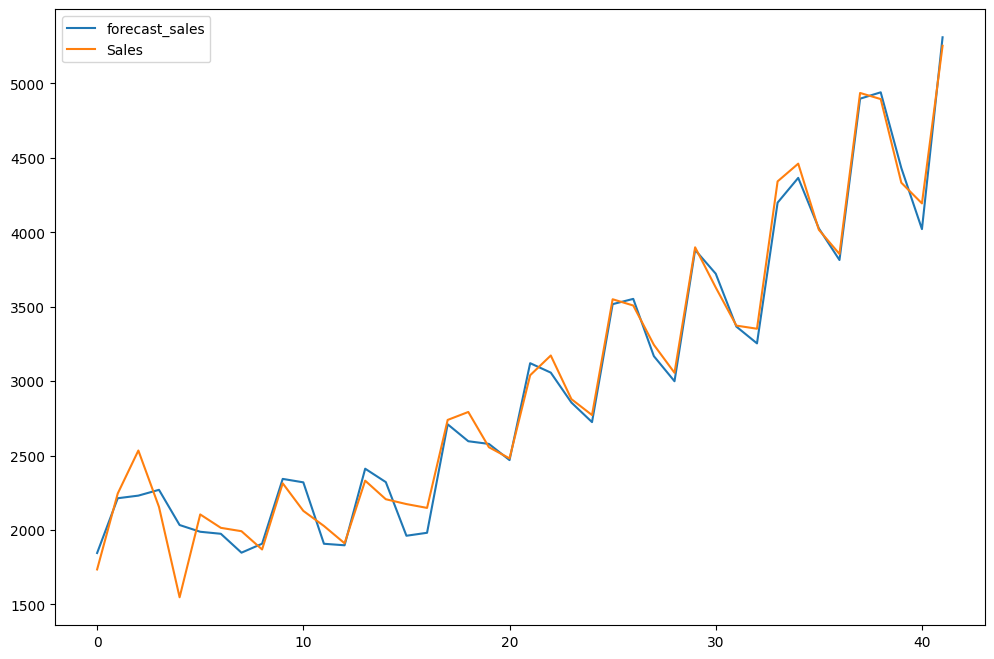

In [95]:
df_coca['forecast_sales']=pd.Series(final_model.predict(start = df_coca.index[0], end = df_coca.index[-1]))
df_coca[['forecast_sales','Sales']].plot(figsize=(12,8))